# Data Preparation & Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

In [7]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [10]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [11]:
# Check for missing values in the train and test datasets
train_missing_values = train_df.isnull().sum()
test_missing_values = test_df.isnull().sum()

# Display missing values for each dataset
train_missing_values, test_missing_values

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [12]:
# Fill missing values in 'Age' with the median of each Pclass group in both train and test datasets
train_df['Age'] = train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Embarked' values with the most common value in the train dataset
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill the missing 'Fare' value in the test dataset with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column since it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Check if all missing values have been handled
train_missing_values_after = train_df.isnull().sum()
test_missing_values_after = test_df.isnull().sum()

train_missing_values_after, test_missing_values_after


C:\Users\brown\AppData\Local\Temp\ipykernel_20732\2239106929.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
C:\Users\brown\AppData\Local\Temp\ipykernel_20732\2239106929.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

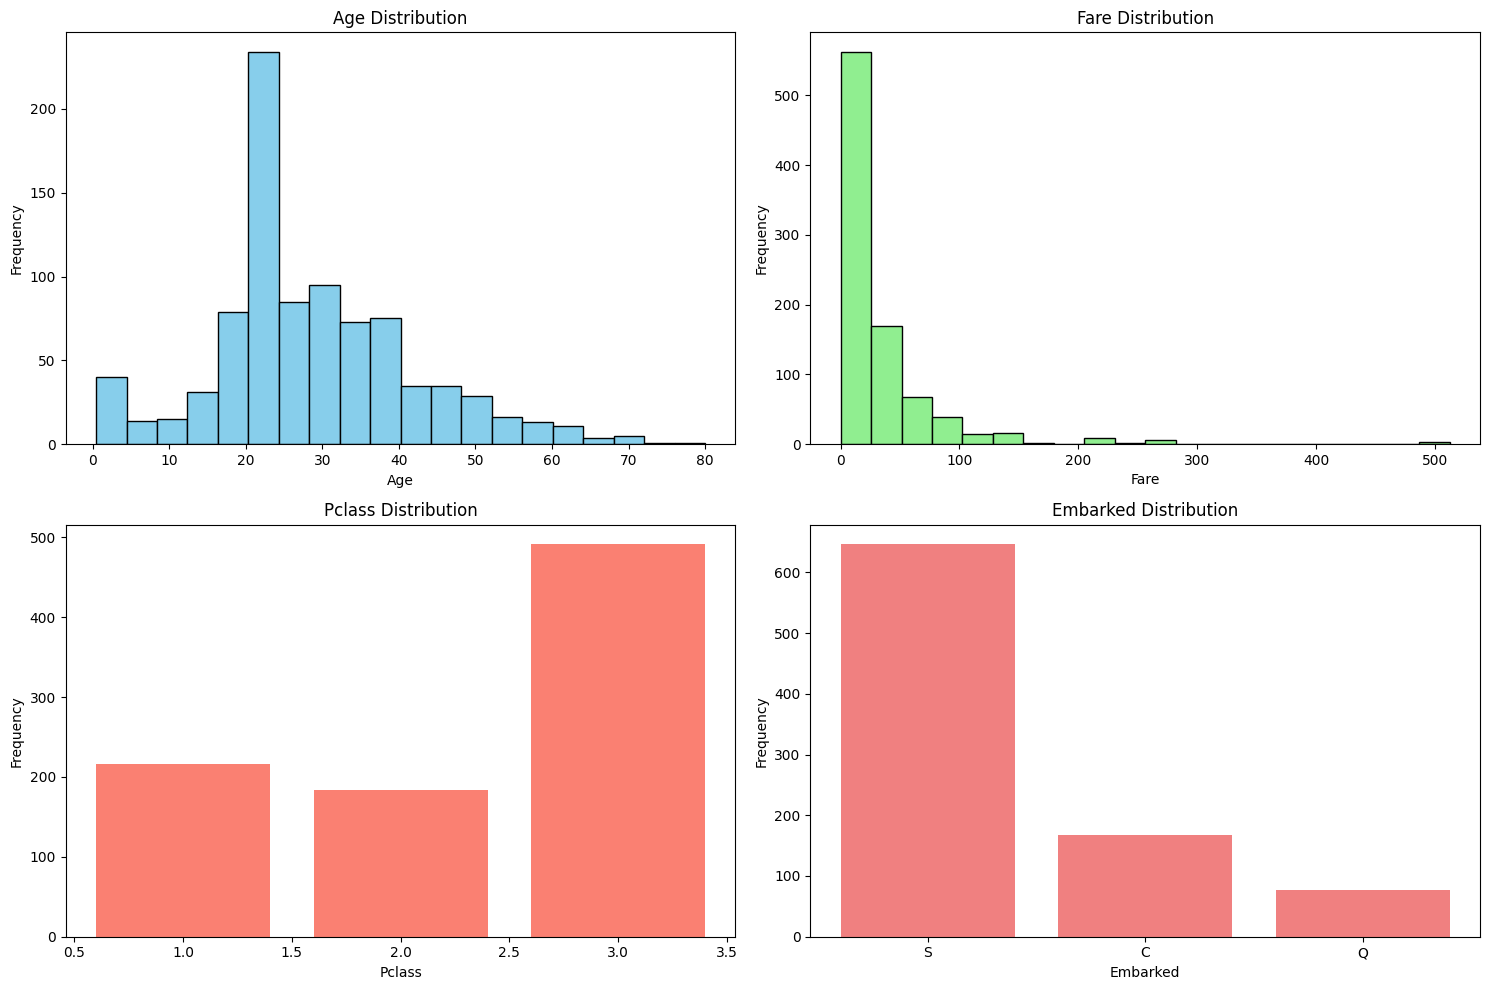

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [13]:
import matplotlib.pyplot as plt

# 1. Analyze the distribution of the target variable (Survived)
survived_counts = train_df['Survived'].value_counts()

# 2. Distribution of key features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axs[0, 0].hist(train_df['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Fare distribution
axs[0, 1].hist(train_df['Fare'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Fare Distribution')
axs[0, 1].set_xlabel('Fare')
axs[0, 1].set_ylabel('Frequency')

# Pclass distribution
axs[1, 0].bar(train_df['Pclass'].value_counts().index, train_df['Pclass'].value_counts().values, color='salmon')
axs[1, 0].set_title('Pclass Distribution')
axs[1, 0].set_xlabel('Pclass')
axs[1, 0].set_ylabel('Frequency')

# Embarked distribution
axs[1, 1].bar(train_df['Embarked'].value_counts().index, train_df['Embarked'].value_counts().values, color='lightcoral')
axs[1, 1].set_title('Embarked Distribution')
axs[1, 1].set_xlabel('Embarked')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Analyze correlation with target variable 'Survived'
correlations = train_df.corr()

correlations['Survived'].sort_values(ascending=False)
